<a href="https://colab.research.google.com/github/Irenemariyam/Python-Basics/blob/main/logisticregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data=files.upload()

Saving titanic.csv to titanic.csv


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
dataset = pd.read_csv("titanic.csv")


In [8]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
count=len(dataset)
print(count)

891


In [13]:
dataset.isnull().sum()
print('Medaian of Age column:%.2f'%(dataset["Age"].median(skipna=True)))
print('Percent of missing records in the cabin column:%.2f%%' %((dataset['Cabin'].isnull().sum()/len(dataset))*100))
print('Most common boarding part of embarkation:%s' %dataset['Embarked'].value_counts().idxmax())

Medaian of Age column:28.00
Percent of missing records in the cabin column:77.10%
Most common boarding part of embarkation:S


In [22]:
dataset['Age'].fillna(dataset['Age'].median(skipna=True),inplace=True)
dataset["Embarked"].fillna(dataset["Embarked"].value_counts().idxmax(),inplace=True)
#dataset.drop("Cabin",axis=1,inplace=True)

In [24]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
dataset.drop("PassengerId",axis=1,inplace=True)
dataset.drop("Name",axis=1,inplace=True)
dataset.drop("Ticket",axis=1,inplace=True)

In [35]:
#dataset["TravelAlone"]=np.where((dataset['Sibsp']+dataset["Parch"])>0,0,1)
#dataset.drop('Sibsp',axis=1,inplace=True)
#dataset.drop("Ticket",axis=1,inplace=True)

In [34]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [36]:
dataset.shape

(891, 8)

In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


3    491
1    216
2    184
Name: Pclass, dtype: int64

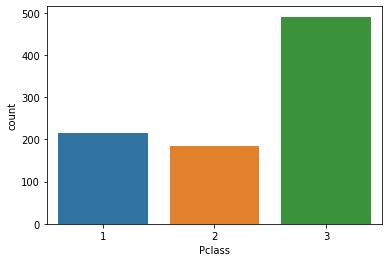

In [39]:
sns.countplot('Pclass',data=dataset)
dataset['Pclass'].value_counts()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


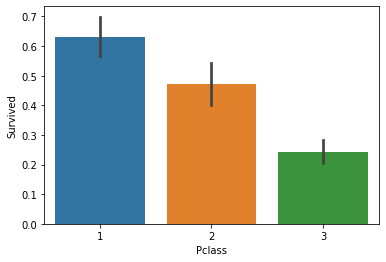

In [43]:
sns.barplot(x='Pclass',y='Survived',data=dataset)
dataset.groupby('Pclass',as_index=False).Survived.mean()